In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
import os
import csv
import sys
from collections import Counter
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
csv.field_size_limit(sys.maxsize)
os.chdir('../Data/Seattle/')

In [2]:
df = pd.read_csv('individual_review_inspection_merged.csv', sep=None,engine='python')

In [274]:
# df = df_output.sample(frac=0.3)
# Create a prediction label with threshold of 40
df['label'] = np.where(df['inspection_penalty_score']>=50, 1, 0)
df2 = df[['content','label']]

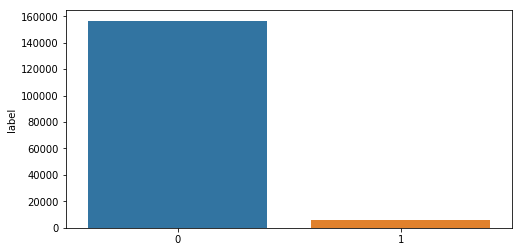

In [275]:
train, test = train_test_split(df2, test_size=0, random_state=42)
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['label'].unique(), y=train['label'].value_counts())
plt.show()

In [276]:
hy_text = [text for text in train[train['label'] == 1]['content']]
nhy_text = [text for text in train[train['label'] == 0]['content']]

In [277]:
print(len(hy_text))
print(len(nhy_text))

5699
156611


In [278]:
import spacy
nlp = spacy.load('en')
# https://stackoverflow.com/questions/40288323/what-do-spacys-part-of-speech-and-dependency-tags-mean
# https://spacy.io/api/annotation#pos-tagging
noisy_pos_tags = ['SPACE','ADP','AUX','CONJ','DET','INTJ','PART','PUNCT','PRON','SCONJ','SYM']
min_token_length = 2

In [299]:
def isNoise(token):
    '''
    Check if the token is a noise or not
    '''
    is_noise = False

    if token.pos_ in noisy_pos_tags: # check for pre-defineed noisy tag
        is_noise = True
    elif token.is_stop == True: # check for stop words
        is_noise = True
    elif token.like_url == True:
        is_noise = True
    elif token.like_num == True:
        is_noise = True
    elif len(str(token)) <= min_token_length:
        is_noise = True
    return is_noise

def cleanup_text(reviews, logging=False):
    cleaned = []
    bigrams = []
    n = 1
    for review in reviews:
        review = nlp(review)
        if n % 10 == 0 and logging:
            print("Processed %d out of %d reviews." % (n, len(reviews)))
        n += 1
        tokens = [token.lemma_.lower().strip() for token in review if not isNoise(token)]
        tokens = ' '.join(tokens)
        cleaned.append(tokens)
        
#         for token in review:
#             bigram = []
#             bigram.append(token.text)
#             if token.i < len(review):
#                 bigram.append(str(review[token.i + 1]))
#                 bigram = ' '.join(bigram)
#                 print(bigram)
#             bigrams.append(bigram)   
    return {'clean':pd.Series(cleaned),'bigram':pd.Series(bigrams)}

In [301]:
l = ['thank', 'local', 'friend', 'recommend', 'restaurant', 'dinner', 'weary', 'traveller', 'little', 'hesitant', 'leave', 'hotel', 'coastal', 'kitchen', 'worth', 'pecan', 'crust', 'salmon', 'avocado', 'butter', 'absolutely', 'delicious', 'coastal', 'kitchen', 'provide', 'relaxing', 'lay', 'atmosphere', 'friendly', 'accomodat', 'service', 'delicious', 'food']

In [304]:
def find_ngrams(input_list, n):
  return zip(*[input_list[i:] for i in range(n)])

In [312]:
l[0:]

['thank',
 'local',
 'friend',
 'recommend',
 'restaurant',
 'dinner',
 'weary',
 'traveller',
 'little',
 'hesitant',
 'leave',
 'hotel',
 'coastal',
 'kitchen',
 'worth',
 'pecan',
 'crust',
 'salmon',
 'avocado',
 'butter',
 'absolutely',
 'delicious',
 'coastal',
 'kitchen',
 'provide',
 'relaxing',
 'lay',
 'atmosphere',
 'friendly',
 'accomodat',
 'service',
 'delicious',
 'food']

In [300]:
hy_clean = cleanup_text(hy_text[5600:],logging=True)

['place', 'great', 'ambiance', 'food', 'service', 'good', 'get', 'sushi', 'fish', 'fresh', 'roll', 'big', 'cheap', 'price', 'expect', 'uni', 'great', 'special', 'flaming', 'tuna', 'roll', 'think', 'spicy', 'will', 'soon', 'hopefully']
['think', 'place', 'potential', 'not', '160;tri', 'chicken', 'skewer', 'plate', 'shrimp', 'good', 'flavor', 'cook', 'think', 'pretty', 'little', 'season', 'even', 'complimentary', 'popcorn', 'way', 'salty', 'kernel', 'season', 'tasty', 'make', 'hard', 'eat', 'time', '160;was', 'expect', 'quick', 'service', 'kind', 'place', 'find', 'slow', 'not', 'busy']
['love', 'tou', 'nyu', 'especially', 'hot', 'sauce', 'especially', 'cold', 'rainy', 'day']
['impression', 'love', 'atmosphere', 'place', 'get', 'seat', 'outside', 'narrow', 'alleyway', 'restaurant', 'building', 'feel', 'cozy', 'open', '-pron-', 'server', 'great', 'very', 'attentive', 'hover', 'table', 'forget', 'tell', 'special', 'biggie', 'food', 'creative', 'tasty', 'go', 'theme', 'costa', 'rica', 'great

['want', 'visit', 'market', 'hear', 'song', 'blue', 'scholars', 'when', 'get', 'definitely', 'old', 'style', 'market', 'typical', 'warehouse', 'market', 'good', 'old', 'style', 'price', 'affordable', 'filipino', 'good', 'available', 'great', 'area', 'sell', 'food', 'item', 'decent', 'price', 'california', 'see', 'filipino', 'base', 'market', 'awesome', 'enjoy', 'time', 'buying', 'good', 'hopefully', 'come', 'parking', 'bad']
['delicious', 'friendly', 'cheap', 'vietnamese', 'deli', 'seattle', 'serve', 'essential', 'banh', 'che', 'goi', 'cuon', 'etc', 'love', 'place', 'thing', 'set', 'aside', 'vietnamese', 'dessert', 'section', 'large', 'place', 'like', 'banh', 'pate', 'use', 'sandwich', 'phenomenal']
['not', 'confuse', 'siagon', 'vietnam', 'deli', 'corner', 'jackson', '12th', 'spot', 'bahn', 'actually', 'think', 'bit', 'problem', 'frank', 'dollar', 'sandwich', 'prepare', 'fresh', 'toasted', 'bread', 'fantastic', 'ingredient', 'have', 'complaint', 'shop', 'vicinity', 'trust', 'shop', 'li

['coins', 'myers', 'briggs', 'test', 'definitely', 'tell', 'volume', 'base', 'reaction', 'place', 'come', 'dad', 'lunch', 'kid', 'summer', 'help', 'work', 'kid', 'love', 'dad', 'have', 'burger', 'fry', 'place', 'go', 'two', 'bells', 'time', 'nearly', 'come', 'eat', 'place', 'wear', 'tie', 'look', 'sharp', 'standard', 'place', 'go', 'hill', 'culture', 'town', 'change', 'j.p.', 'patches', 'stan', 'borreson', 'rule', 'northwest', 'local', 'nostalgia', 'aside', 'help', 'sum', 'coin', 'great', 'place', 'not', 'bring', 'date', 'be', 'drunk', 'egg', 'benedict', 'wait', 'effect', 'coffee', 'kick', 'place', 'not', 'overrate', 'have', 'hear', 'food', 'place', 'great', 'haggard', 'joint', 'sober', 'date', 'dump', 'and/or', 'be', 'lazy', 'cook', 'experience', 'pleasant', 'pretend', 'be', 'mobster', 'lot', 'patience', 'launder', 'money', 'manager', 'nod', 'head', 'wrinkle', 'lip', 'brow', 'deniro', 'goodfellas', 'finish', 'meal', 'wipe', 'mouth', 'linen', 'napkin', 'way', 'nice', 'little', 'sleep',

['love', 'pan', 'asian', 'actually', 'good', 'sushi', 'not', 'believe', 'size', 'fish', 'serve', 'nigiri', 'seattle', 'thing', 'general', 'restaurant', '160;also', 'come', 'east', 'coast', 'find', 'use', 'fresh', 'veggie', 'whatnot', 'roll', 'different', 'unique', 'restaurant', 'boston', 'rarely', 'maki', 'roll', 'cucumber', 'avocado', 'cold', 'sake', 'ruby', 'excellent', 'tell', 'try', 'pearl', 'dry', 'glad', 'stick', 'gun', 'ruby', 'dry', 'tasty']
Processed 50 out of 99 reviews.
['love', 'place', 'dive', 'mean', 'service', 'marginal', 'drink', 'fantastic', 'cheap', 'food', 'loud', 'music', 'cute', 'little', 'deck', 'family', 'hit', 'spot']
['meh', 'quick', 'cheap', 'poor', 'quality', 'just', 'review']
['love', 'place', 'delicious', 'wish', 'little', 'affordable', 'expect', 'organic']
['taco', 'truck', 'high', 'quality', 'great', 'menu', 'choose', 'everything', 'come', 'wait', 'look', 'great', 'taco', 'fixin', 'order', 'delicious', 'drawback', 'wait', 'give', 'truck', 'semi', 'permane

Processed 70 out of 99 reviews.
['when', 'towner', 'come', 'visit', 'usually', 'dim', 'sum', 'why', 'ask', 'easy', 'parking', 'lot', 'good', 'group', 'fairly', 'price', 'dim', 'sum', 'good', 'touch', 'oil', 'time)and', 'know', 'lady', 'cart', 'aloof', 'ton', 'people', 'star', 'willing', 'stop', 'table', 'just', 'sure', 'group', 'fair', 'think', 'cart', 'pass', 'way', 'good', 'bad', 'people', 'eat', 'pair']
['waste', 'lunch', 'break', 'today', 'walk', '5th', 'union', 'website', 'try', 'food', '160;they', '160;after', 'get', 'office', 'see', 'twitter', 'feed', 'say', 'slu', '160;that', 'post', 'hour', 'ago', '11:30', 'site', 'say', 'downtown', '160;apparently', 'disorganized', 'probably', 'not', 'bode', 'food']
['teriyaki', 'joint', 'dine', 'takeout', 'have', 'frequent', 'orange', 'king', 'college', 'day', 'management', 'change', 'time', 'consistently', 'serve', 'tasty', 'food', 'fair', 'price', 'seriously', 'ave', 'choose', 'teriyaki', 'burger', 'prepared', 'busy', 'lunch', 'crowd', 'co

['bus', 'skylark', 'night', 'murder', 'party', 'play', 'easy', 'expect', 'bus', 'go', 'capital', 'hill', 'house', 'go', 'right', 'skylark', 'either', 'second', 'stop', 'soon', 'get', 'west', 'seattle', 'bridge', 'walk', 'distance', 'place', 'bus', 'come', '11:30pm', 'make', 'great', 'place', 'dinner', 'start', 'night', 'drinking', 'work', 'way', 'home', 'way', 'favorite', 'bar', 'little', 'small', 'venue', 'twilight', 'size', 'expect', 'big', 'far', 'city', 'turn', 'nice', 'high', 'ceiling', 'definitely', 'feel', 'big', 'live', 'music', 'great', 'band', 'play', 'right', 'bar', 'venue', 'jules', 'mae', 'band', 'room', 'not', 'crowd', 'capital', 'hill', 'venue', 'comet', 'show', 'early', 'probably', 'order', 'food', 'sit', 'waitress', 'find', 'hummus', 'appetizer', 'place', 'great', 'super', 'fresh', 'vegan', 'sandwich', 'awesome', 'be', 'cheese', 'grill', 'cheese', 'sandwich', 'appetizer', 'mozzarella', 'log', 'sound', 'wonderful', 'check', 'online', 'menu', 'wonder', 'ghetto', 'platter

In [281]:
hy_clean

0     place great ambiance food service good get sus...
1     think place potential not 160;tri chicken skew...
2     love tou nyu especially hot sauce especially c...
3     impression love atmosphere place get seat outs...
4     be look night stand tuesday afternoon peso pla...
5     not believe review fly fish locate first avenu...
6     place choice quick chinese snack order congee ...
7     get korean food shin anything kimchi instant w...
8     rocking wok delectable destination love menu 1...
9     love vietnamese deli honestly food great quali...
10    wander new neighborhood evening try find uncro...
11    fact wait seat strong testament popularity del...
12    place practically lunchtime monday not deter t...
13    one good taco truck burrito have horchata good...
14    meeeeeeh thought check compare blue sushiland ...
15    vouch sushi sashimi good and good place what c...
16    want visit market hear song blue scholars when...
17    delicious friendly cheap vietnamese deli s

In [266]:
Counter(hy_clean['entity']).most_common(30)

[('', 143510),
 ('MONEY', 2583),
 ('ORG', 1643),
 ('CARDINAL', 1203),
 ('PERSON', 1039),
 ('DATE', 1002),
 ('TIME', 960),
 ('GPE', 735),
 ('NORP', 576),
 ('ORDINAL', 214),
 ('LOC', 191),
 ('FAC', 156),
 ('WORK_OF_ART', 105),
 ('PRODUCT', 92),
 ('QUANTITY', 79),
 ('PERCENT', 47),
 ('EVENT', 38),
 ('LANGUAGE', 14),
 ('LAW', 12)]

In [267]:
hy_clean = cleanup_text(nhy_text[158000:],logging=True)

Processed 10 out of 1305 documents.
Processed 20 out of 1305 documents.
Processed 30 out of 1305 documents.
Processed 40 out of 1305 documents.
Processed 50 out of 1305 documents.
Processed 60 out of 1305 documents.
Processed 70 out of 1305 documents.
Processed 80 out of 1305 documents.
Processed 90 out of 1305 documents.
Processed 100 out of 1305 documents.
Processed 110 out of 1305 documents.
Processed 120 out of 1305 documents.
Processed 130 out of 1305 documents.
Processed 140 out of 1305 documents.
Processed 150 out of 1305 documents.
Processed 160 out of 1305 documents.
Processed 170 out of 1305 documents.
Processed 180 out of 1305 documents.
Processed 190 out of 1305 documents.
Processed 200 out of 1305 documents.
Processed 210 out of 1305 documents.
Processed 220 out of 1305 documents.
Processed 230 out of 1305 documents.
Processed 240 out of 1305 documents.
Processed 250 out of 1305 documents.
Processed 260 out of 1305 documents.
Processed 270 out of 1305 documents.
Processed 

In [270]:
Counter(hy_clean['entity']).most_common(30)

[('', 189695),
 ('MONEY', 3500),
 ('ORG', 2109),
 ('CARDINAL', 1439),
 ('DATE', 1343),
 ('PERSON', 1264),
 ('TIME', 1233),
 ('GPE', 859),
 ('NORP', 504),
 ('ORDINAL', 279),
 ('LOC', 230),
 ('WORK_OF_ART', 181),
 ('FAC', 171),
 ('QUANTITY', 112),
 ('PRODUCT', 106),
 ('EVENT', 58),
 ('PERCENT', 43),
 ('LAW', 13),
 ('LANGUAGE', 5)]

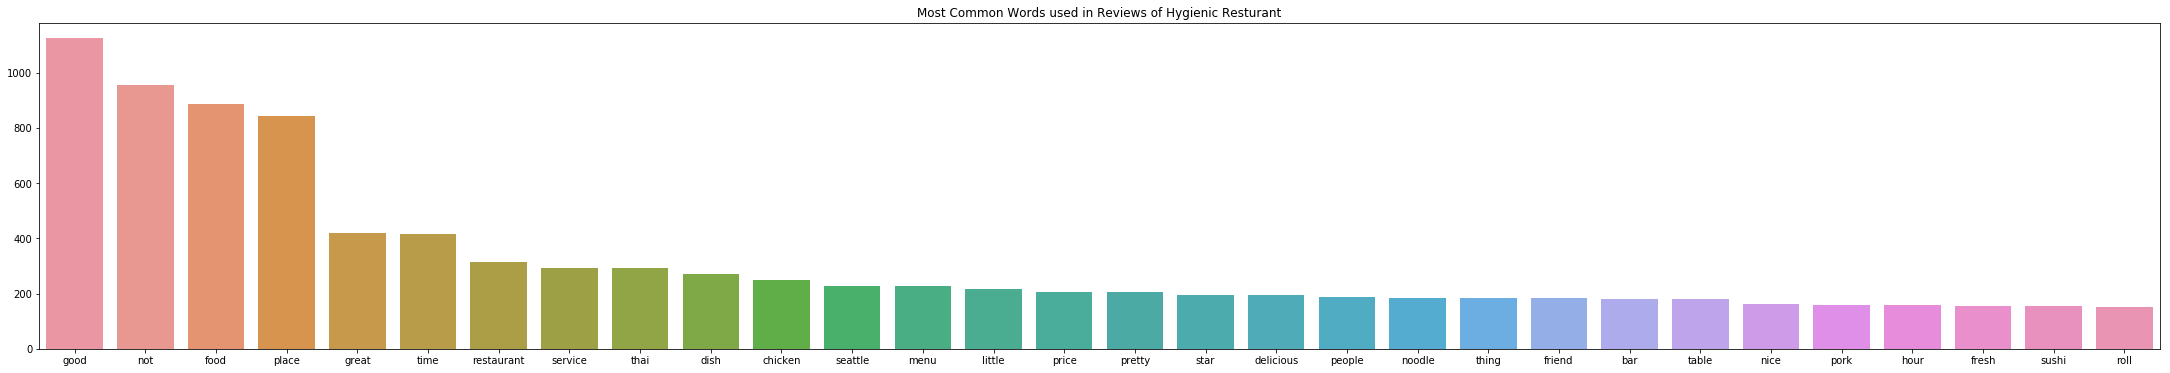

In [226]:
hy_clean = ' '.join(hy_clean).split()
hy_counts = Counter(hy_clean)
hy_common_words = [word[0] for word in hy_counts.most_common(30)]
hy_common_counts = [word[1] for word in hy_counts.most_common(30)]
fig = plt.figure(figsize=(38,6))
sns.barplot(x=hy_common_words, y=hy_common_counts)
plt.title('Most Common Words used in Reviews of Hygienic Resturant')
plt.show()

In [219]:
nhy_clean = cleanup_text(nhy_text[158000:],logging=True)

Processed 10 out of 1305 documents.
Processed 20 out of 1305 documents.
Processed 30 out of 1305 documents.
Processed 40 out of 1305 documents.
Processed 50 out of 1305 documents.
Processed 60 out of 1305 documents.
Processed 70 out of 1305 documents.
Processed 80 out of 1305 documents.
Processed 90 out of 1305 documents.
Processed 100 out of 1305 documents.
Processed 110 out of 1305 documents.
Processed 120 out of 1305 documents.
Processed 130 out of 1305 documents.
Processed 140 out of 1305 documents.
Processed 150 out of 1305 documents.
Processed 160 out of 1305 documents.
Processed 170 out of 1305 documents.
Processed 180 out of 1305 documents.
Processed 190 out of 1305 documents.
Processed 200 out of 1305 documents.
Processed 210 out of 1305 documents.
Processed 220 out of 1305 documents.
Processed 230 out of 1305 documents.
Processed 240 out of 1305 documents.
Processed 250 out of 1305 documents.
Processed 260 out of 1305 documents.
Processed 270 out of 1305 documents.
Processed 

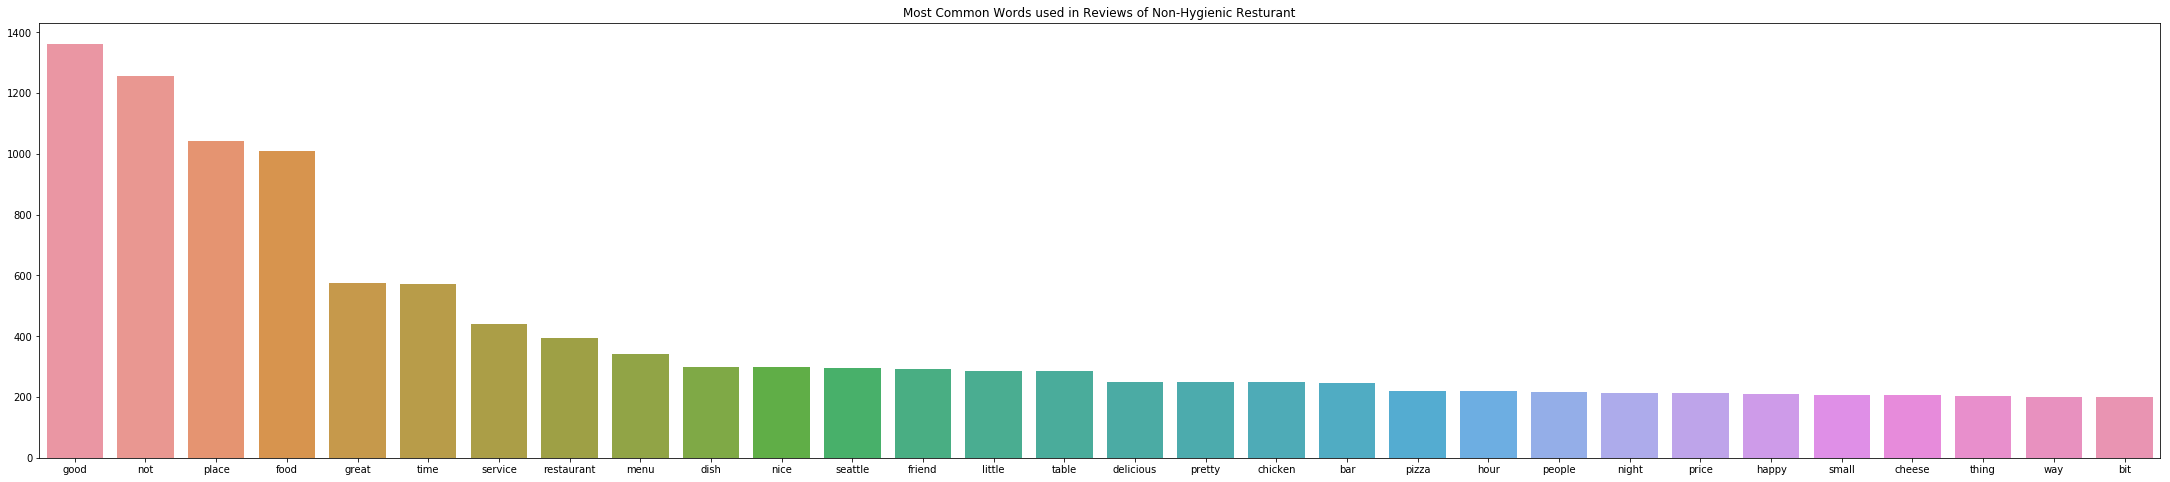

In [227]:
nhy_clean = ' '.join(nhy_clean).split()
nhy_counts = Counter(nhy_clean)
nhy_common_words = [word[0] for word in nhy_counts.most_common(30)]
nhy_common_counts = [word[1] for word in nhy_counts.most_common(30)]
fig = plt.figure(figsize=(38,8))
sns.barplot(x=nhy_common_words, y=nhy_common_counts)
plt.title('Most Common Words used in Reviews of Non-Hygienic Resturant')
plt.show()

In [216]:
def pos_words (sentence, token, ptag):
    '''
    check all tags used with a word
    '''
    # extract all review sentences that contains the term - token
    sentences = [sent for sent in sentence.sents if token in sent.string.lower()]
    pwrds = []
    for sent in sentences:
        for word in sent:
            if token in word.string:
                pwrds.extend([child.string.strip() for child in word.childrenw
                if child.pos_ == ptag])
    return Counter(pwrds).most_common(10)

In [ ]:
# Check all adj used with the term food
pos_words(doc, 'food', 'ADJ')


# Head

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

df = pd.read_csv('wine_data.csv')

counter = Counter(df['variety'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

description_list = df['description'].tolist()
varietal_list = [top_10_varieties[i] for i in df['variety'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))